Saving Dataset_spine.csv to Dataset_spine (1).csv


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pelvic incidence             310 non-null    float64
 1    pelvic tilt                 310 non-null    float64
 2    lumbar lordosis angle       310 non-null    float64
 3    sacral slope                310 non-null    float64
 4    pelvic radius               310 non-null    float64
 5    grade of spondylolisthesis  310 non-null    float64
 6   Class_att                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,0
pelvic incidence,0
pelvic tilt,0
lumbar lordosis angle,0
sacral slope,0
pelvic radius,0
grade of spondylolisthesis,0
Class_att,0


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


,Feature,Coefficient
0,pelvic incidence,-1.283076e+06
1,pelvic tilt,1.283076e+06
2,lumbar lordosis angle,5.229659e-03
3,sacral slope,1.283076e+06
4,pelvic radius,-1.346082e-02
5,grade of spondylolisthesis,5.347126e-03


,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,1
9,1,1


array([[16,  5],
       [ 8, 49]])

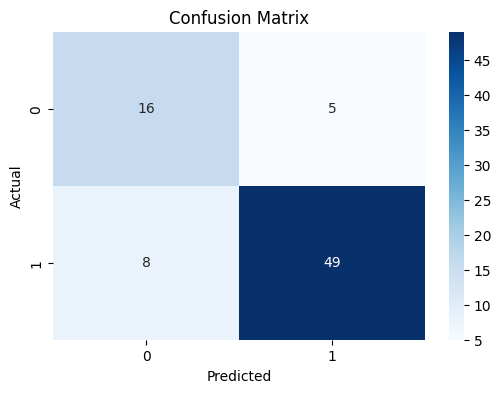

0.8333333333333334


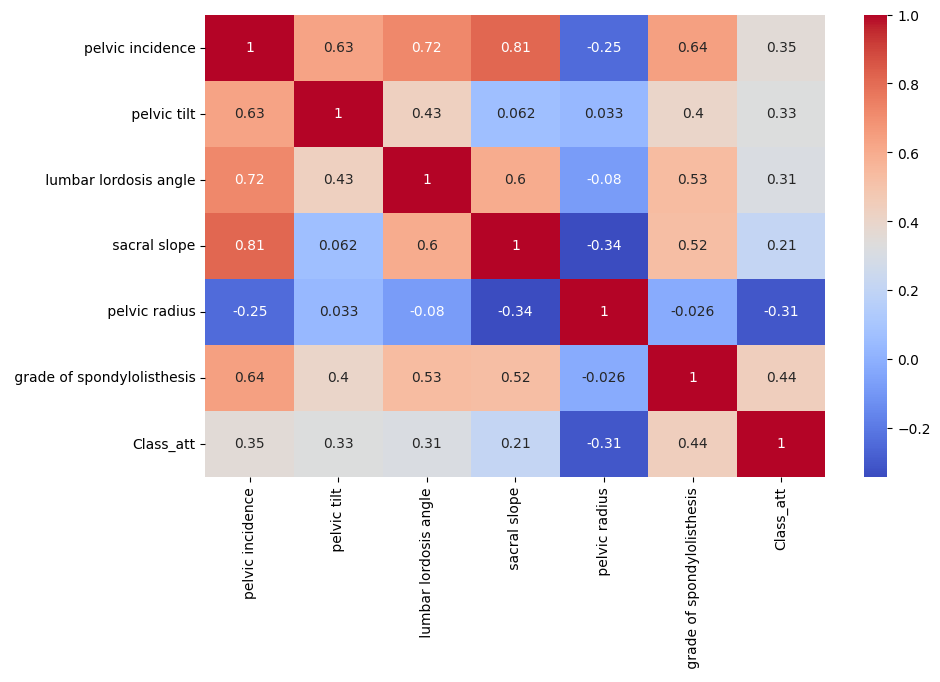

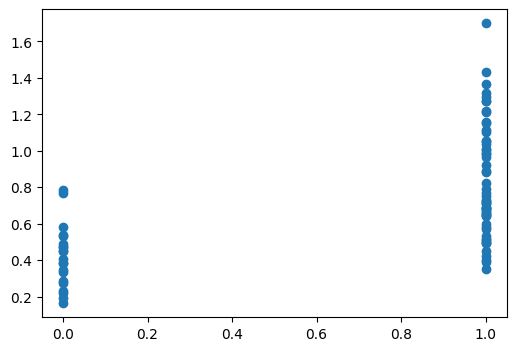

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('/content/Dataset_spine.csv')

display(df.head())
df.info()
display(df.isnull().sum())

df['Class_att'] = df['Class_att'].map({'Normal': 0, 'Abnormal': 1})
display(df.head())

X = df.drop('Class_att', axis=1)
y = df['Class_att']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
display(coeff_df)

y_pred_continuous = model.predict(X_test)
y_pred = (y_pred_continuous >= 0.5).astype(int)

prediction_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
display(prediction_table.head(10))

cm = confusion_matrix(y_test, y_pred)
display(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_continuous)
plt.show()
